In [1]:
import numpy as np, matplotlib.pyplot as plt 
from scipy.integrate import quad
import astropy.units as u
from astropy.constants import c
import warnings; warnings.filterwarnings('ignore')
plt.rc('font', family = 'serif'); plt.rc('text',usetex= True)
plt.rc('axes', lw = 2)

In [2]:
def dc_standard_integrand(z):    
    Ez = np.sqrt(0.3*(1+z)**3 + 0.7)
    return  1/Ez
    
def get_standard_dc(zmin, zmax):
    res, err = quad(dc_standard_integrand, zmin, zmax)
    return (c / (70 * u.km/u.s/u.Mpc) * res).to(u.Mpc).value


def get_standard_dA(z_arr):
    dc_standard_vals = [get_standard_dc(0,z) for z in z_arr]
    return  dc_standard_vals / (1+z_arr) 

def get_standard_dL(z_arr):
    dc_standard_vals = [get_standard_dc(0,z) for z in z_arr]
    return  dc_standard_vals * (1+z_arr) 

In [3]:
def dc_matteronly_integrand(z):    
    Ez = np.sqrt(1*(1+z)**3)
    return  1/Ez
    
def get_matteronly_dc(zmin, zmax):
    res, err = quad(dc_matteronly_integrand, zmin, zmax)
    return (c / (70 * u.km/u.s/u.Mpc) * res).to(u.Mpc).value


def get_matteronly_dA(z_arr):
    dc_matteronly_vals = [get_matteronly_dc(0,z) for z in z_arr]
    return  dc_matteronly_vals / (1+z_arr) 

def get_matteronly_dL(z_arr):
    dc_matteronly_vals = [get_matteronly_dc(0,z) for z in z_arr]
    return  dc_matteronly_vals * (1+z_arr) 

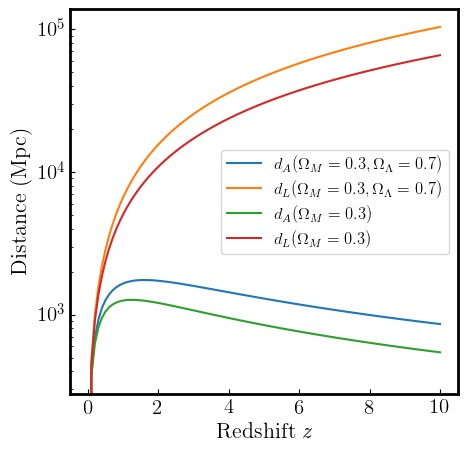

In [4]:
z_arr = np.linspace(0,10,100)

plt.figure(figsize = (5,5))

dA = get_standard_dA(z_arr); plt.plot(z_arr,dA, label = r'$d_A (\Omega_M = 0.3, \Omega_\Lambda = 0.7)$')
dL = get_standard_dL(z_arr); plt.plot(z_arr,dL, label = r'$d_L (\Omega_M = 0.3, \Omega_\Lambda = 0.7)$')

dA_matteronly = get_matteronly_dA(z_arr); plt.plot(z_arr,dA_matteronly, label = r'$d_A (\Omega_M = 0.3)$')
dL_matteronly = get_matteronly_dL(z_arr); plt.plot(z_arr,dL_matteronly, label = r'$d_L (\Omega_M = 0.3)$')

plt.yscale('log')

plt.ylabel('Distance (Mpc)', fontsize = 16); plt.xlabel(r'Redshift $z$', fontsize = 16)
plt.legend(loc = 'center right', fontsize = 12)

plt.gca().tick_params(which = 'both', direction = 'in', labelsize = 15)


plt.savefig('Distances.pdf', bbox_inches = 'tight')

## Redshift for lookback time 10 Gyr

In [5]:
def lookback_integrand(z):    
    Ez = np.sqrt(0.3*(1+z)**3 + 0.7)
    return 1/Ez * 1/(1+z)

In [6]:
def lookback_time(zlowerbound,zupperbound):
    
    res, err = quad(lookback_integrand,zlowerbound,zupperbound)
    
    t = (1 / (70 * u.km/u.s/u.Mpc)).to(u.Gyr).value  * res
    
    return t

In [7]:
zgrid = np.linspace(0,5,50000)
lookbacktimes = np.asarray([lookback_time(0,z) for z in zgrid])
residuals = np.abs(lookbacktimes - 10)
bestmatch = zgrid[np.argmin(residuals)]
bestres = lookbacktimes[np.argmin(residuals)]

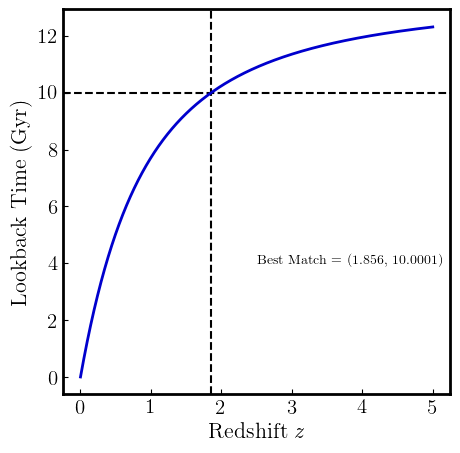

In [8]:
plt.figure(figsize = (5,5))
plt.plot(zgrid,lookbacktimes, color = 'mediumblue', lw = 2)
plt.axvline(bestmatch, color = 'black', zorder = -5, ls = '--')
plt.axhline(bestres, color = 'black', zorder = -5, ls = '--')

plt.gca().tick_params(which = 'both', direction = 'in', labelsize = 15)
plt.ylabel('Lookback Time (Gyr)', fontsize = 16); plt.xlabel(r'Redshift $z$', fontsize = 16)

plt.gca().text(2.5,4,'Best Match = (%.3f, %.4f)'%(bestmatch,bestres))


plt.savefig('LookbackTimes.pdf', bbox_inches = 'tight')

## Series Expansion

In [9]:
def integrand_for_chi(z, A = 0.3, B = 0.7):
    return (A * (1+z)**3 + B  + (1-A-B)*(1+z)**2)**(-1/2)
    
def do_integral_full(zmax): 
    res, err= quad(integrand_for_chi,0,zmax)
    return (c / (70 * u.km/u.s/u.Mpc) * res).to(u.Mpc).value 

def do_integral_approx2(zmax): 
    res = zmax - 0.45 * zmax**2 * 0.5 - (1/3 *0.14625)*zmax**3
    return (c / (70 * u.km/u.s/u.Mpc) * res).to(u.Mpc).value 

In [10]:
z_array = np.linspace(0,2,1000)
integral_results = np.asarray([do_integral_full(z) for z in z_array])
approx = np.asarray([do_integral_approx2(z) for z in z_array])

1.2032032032032032


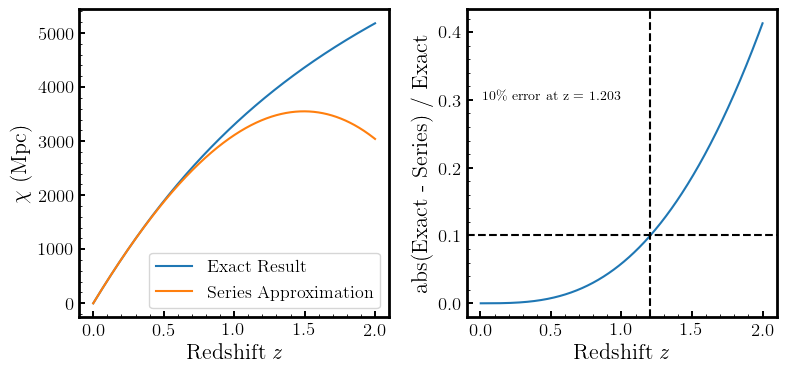

In [17]:
fig, axs = plt.subplots(1,2,figsize = (9,4))
plt.subplots_adjust(wspace = 0.25)


axs[0].plot(z_array, integral_results, label = 'Exact Result')
axs[0].plot(z_array, approx, label = 'Series Approximation')
axs[0].set_ylabel(r'$\chi$ (Mpc)', fontsize = 16); axs[0].set_xlabel(r'Redshift $z$', fontsize = 16)
axs[0].legend(loc = 'lower right', fontsize = 13)

axs[1].set_ylabel('abs(Exact - Series) / Exact', fontsize = 16); axs[1].set_xlabel(r'Redshift $z$', fontsize = 16)
axs[1].plot(z_array, np.abs(integral_results - approx)/(integral_results), label = 'Exact Result')
axs[1].axhline(0.1, ls = '--', color = 'black')
axs[1].axvline(1.2, ls = '--', color = 'black')

for ax in axs: 
    ax.tick_params(which = 'both', direction = 'in', labelsize = 13.5)
    ax.tick_params(which = 'major', length =4, width= 1.4); ax.tick_params(which = 'minor', length = 2)
    ax.minorticks_on()

threshold = z_array[(integral_results - approx)/(integral_results) < 0.1].max()
print(threshold)

_ = axs[1].text(0.02,0.3,'10\%% error at z = %.3f'%threshold)

plt.savefig('SeriesAccuracy.pdf', bbox_inches = 'tight')